## __Tasks and Challenges:__
1. From raster images, extract features (__points, lines, polygons__) by using the map legend as reference; --> vectorization features as shapefiles
2. The approach has to be generic, as these raster images were created inconsistently;

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import cv2
from PIL import Image, ImageDraw

In [2]:
import geopandas as gpd
from rasterio.plot import show
from rasterio.crs import CRS
from keras_spatial import SpatialDataGenerator

In [3]:
filePath = '/home/shared/DARPA/training/'

## Exploratory data analysis

In [34]:
! ls  /home/shared/DARPA/training/WI_Pittsville_*

/home/shared/DARPA/training/WI_Pittsville_503467_1957_48000_geo_mosaic_1_pt.tif
/home/shared/DARPA/training/WI_Pittsville_503467_1957_48000_geo_mosaic_5_pt.tif
/home/shared/DARPA/training/WI_Pittsville_503467_1957_48000_geo_mosaic.json
/home/shared/DARPA/training/WI_Pittsville_503467_1957_48000_geo_mosaic.tif


Each map image comes with a json file, which specifies the pixel
coordinates of the legend symbol for each of the features of interest in that map.

- The number of labeled files is the same as the number of legends in this json file (jsonData['shapes'])

In [29]:
jsonName = 'WI_Pittsville_503467_1957_48000_geo_mosaic.json'
tifName = 'WI_Pittsville_503467_1957_48000_geo_mosaic.tif'
label_1_Name = 'WI_Pittsville_503467_1957_48000_geo_mosaic_1_pt.tif'
label_5_Name = 'WI_Pittsville_503467_1957_48000_geo_mosaic_5_pt.tif'

In [30]:
with open(filePath+jsonName, 'r') as f:
    jsonData = json.load(f)
jsonData

{'version': '5.0.1',
 'flags': {},
 'shapes': [{'label': '1_pt',
   'points': [[0.0, 8129.72972972973],
    [51.351351351351354, 8175.675675675676]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': '5_pt',
   'points': [[1640.5405405405406, 8135.135135135135],
    [1702.7027027027027, 8175.675675675676]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\WI_Pittsville_503467_1957_48000_geo_mosaic.tif',
 'imageData': None,
 'imageHeight': 8179,
 'imageWidth': 6479}

In [31]:
im = Image.open(filePath+tifName)
imarray = np.array(im) 
imarray.shape

(8179, 6479, 3)

In [32]:
#im.show()

[0.0, 8129.72972972973, 51.351351351351354, 8175.675675675676]


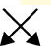

[1640.5405405405406, 8135.135135135135, 1702.7027027027027, 8175.675675675676]


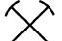

In [33]:
# visualize the legend info that sit in the json file
from itertools import chain
for i in range(len(jsonData['shapes'])):
    list_2d = jsonData['shapes'][i]['points']
    flatten_list = list(chain.from_iterable(list_2d))
    print(flatten_list)
    im_crop_outside = im.crop(flatten_list)
    im_crop_outside.show()

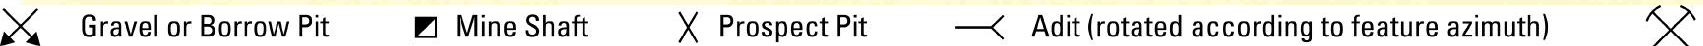

In [34]:
im_crop_outside = im.crop((0.0, 8129.72972972973, 1702.7027027027027, 8175.675675675676))
im_crop_outside.show()

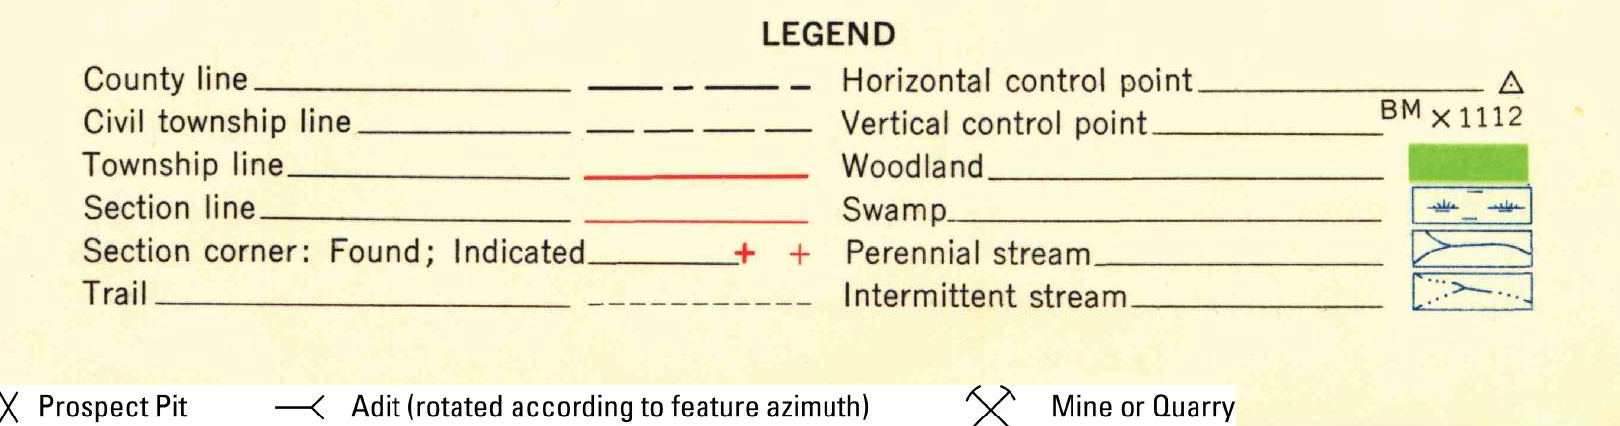

In [35]:
im_crop_outside = im.crop((680, 7750, 2300, 8175.675675675676))
im_crop_outside.show()

In [36]:
# visualize the label data

im_label_1 = Image.open(filePath+label_1_Name)
imarray_1 = np.array(im_label_1) 

im_label_5 = Image.open(filePath+label_5_Name)
imarray_5 = np.array(im_label_5) 

imarray_1.shape, imarray_5.shape  # mostly are zeros

((8179, 6479), (8179, 6479))

In [37]:
labeled_points = np.argwhere(imarray_1 != 0)
labeled_points

array([[1443, 3470],
       [1481, 5229],
       [1882, 3148],
       [1933, 5529],
       [2184, 5427],
       [2395, 4276],
       [3333, 1903],
       [3342, 3260],
       [3431, 1952],
       [3763, 3075],
       [3764, 1114],
       [4134, 5075],
       [4175, 5417],
       [4226, 5034],
       [4234, 5077],
       [4279, 5092],
       [4311, 5110],
       [4371, 5175],
       [4410, 5167],
       [4549, 5053],
       [4551, 5176],
       [4598, 4346],
       [4618, 4367],
       [4624, 5067],
       [5226, 2543],
       [5238, 2104],
       [5240, 2676],
       [5267, 2163],
       [5358, 4482],
       [5685, 4558],
       [5887, 5050],
       [5906, 5302],
       [5921, 5062],
       [5944, 5253],
       [5964, 5085],
       [6588, 1274]])

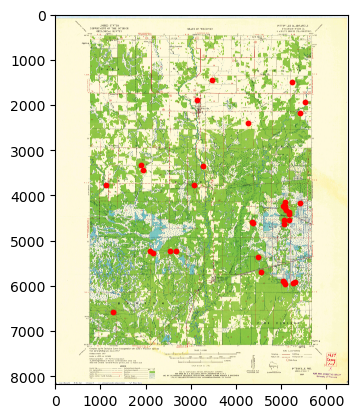

In [38]:
im = plt.imread(filePath+tifName)
implot = plt.imshow(im)

plt.scatter(x=labeled_points[:,1], y=labeled_points[:,0], c='r', s=10)
plt.show()

In [95]:
np.argwhere(imarray_5 != 0)  ## the only point not zero

array([[3224, 2031]])

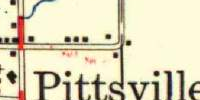

In [98]:
im_crop_outside = im.crop((3200, 2000, 3400, 2100))   # seems to be the only city in this map
im_crop_outside.show()

In [4]:
! ls  /home/shared/DARPA/training/ID_Pullman*

/home/shared/DARPA/training/ID_Pullman_ag_poly.tif
/home/shared/DARPA/training/ID_Pullman_Jm_poly.tif
/home/shared/DARPA/training/ID_Pullman.json
/home/shared/DARPA/training/ID_Pullman_Kid_poly.tif
/home/shared/DARPA/training/ID_Pullman_Kigr_poly.tif
/home/shared/DARPA/training/ID_Pullman_Ki_poly.tif
/home/shared/DARPA/training/ID_Pullman_Kiqm_poly.tif
/home/shared/DARPA/training/ID_Pullman_Kis_poly.tif
/home/shared/DARPA/training/ID_Pullman_Kit_poly.tif
/home/shared/DARPA/training/ID_Pullman_Kogd_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCl_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCpq_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCps_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCrq_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCsp_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCsr_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCu_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCwg_poly.tif
/home/shared/DARPA/training/ID_Pullman_pCw_poly.tif
/home/shared/D

In [4]:
jsonName = 'ID_Pullman.json'
tifName = 'ID_Pullman.tif'
label_Tsy_poly_Name = 'ID_Pullman_Tsy_poly.tif'
label_TRm_poly_Name = 'ID_Pullman_TRm_poly.tif'

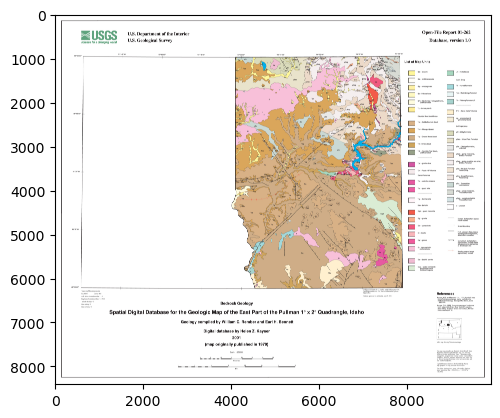

In [5]:
im = plt.imread(filePath+tifName)
implot = plt.imshow(im)
plt.show()

In [2]:
with open(filePath+jsonName, 'r') as f:
    jsonData = json.load(f)


NameError: name 'filePath' is not defined

In [7]:
index = 7
jsonData['shapes'][index]['label'],  jsonData['shapes'][index]['points']

('Tci_poly',
 [[8032.467532467533, 2931.1688311688313],
  [8172.727272727273, 3027.272727272727]])

In [8]:
im = Image.open(filePath+tifName)
#im.show()

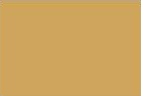

In [9]:
im_crop_outside = im.crop([8032.467532467533, 2931.1688311688313,
  8172.727272727273, 3027.272727272727])
im_crop_outside.show()

In [10]:
label_Tci_poly_Name = 'ID_Pullman_Tci_poly.tif'

In [11]:
label_Tci = Image.open(filePath+label_Tci_poly_Name)
imarray_Tci = np.array(label_Tci) 

In [12]:
labeled_points = np.argwhere(imarray_Tci != 0)
len(labeled_points)

315023

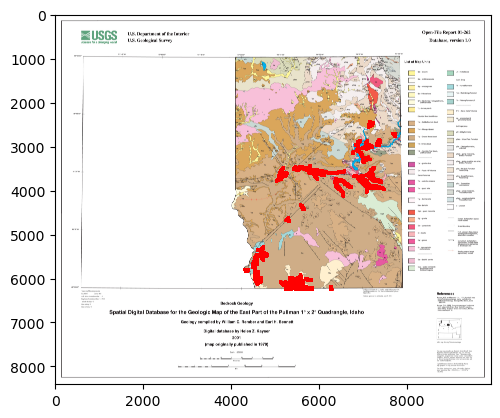

In [49]:
im = plt.imread(filePath+tifName)

implot = plt.imshow(im)

plt.scatter(x=labeled_points[:,1], y=labeled_points[:,0], c='r', s=1)
plt.show()

### select  RGB from legend color

In [13]:
index = 7
jsonData['shapes'][index]['label'],  jsonData['shapes'][index]['points']


('Tci_poly',
 [[8032.467532467533, 2931.1688311688313],
  [8172.727272727273, 3027.272727272727]])

In [14]:
Tci_poly_box = jsonData['shapes'][index]['points']
Tci_poly_box_middle_x = int((Tci_poly_box[0][0] + Tci_poly_box[1][0])/2)
Tci_poly_box_middle_y = int((Tci_poly_box[0][1] + Tci_poly_box[1][1])/2)
Tci_poly_box_middle_x, Tci_poly_box_middle_y

(8102, 2979)

In [15]:
im = Image.open(filePath+tifName)
imarray = np.array(im) 
imarray.shape

(8406, 9904, 3)

In [16]:
R, G, B = imarray[Tci_poly_box_middle_y][Tci_poly_box_middle_x] 
R, G, B

(207, 165, 93)

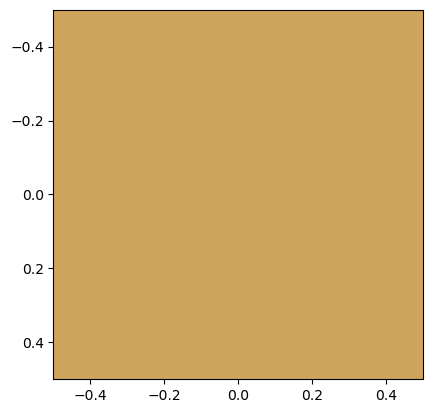

In [17]:
plt.imshow([[[R, G, B]]])
plt.show()

### HSI transform (hue, satu)

In [22]:
im = cv2.imread(filePath+tifName)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [25]:
hsv_im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

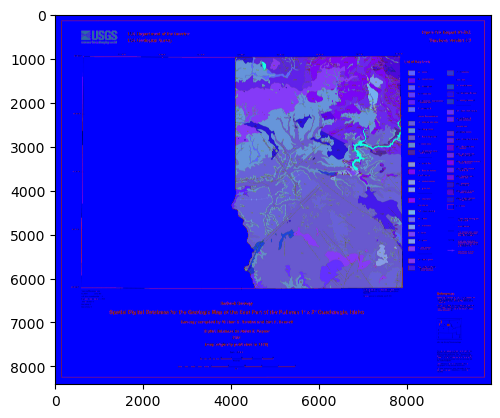

In [26]:
plt.imshow(hsv_im)
plt.show()

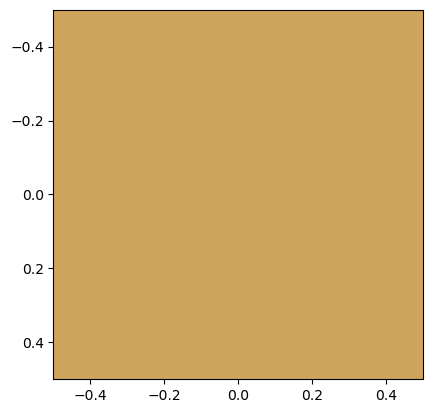

In [30]:
RGB = (R, G, B)
plt.imshow([[list(RGB)]])
plt.show()

In [53]:
RGB_low = [x-10 for x in RGB]
RGB_high = [x+10 for x in RGB]

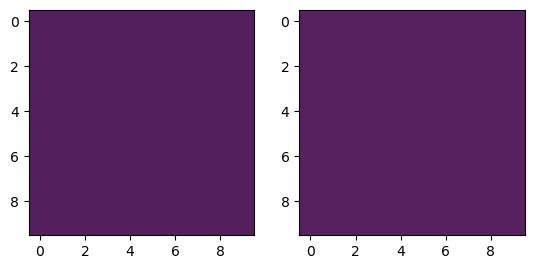

In [49]:
from matplotlib.colors import hsv_to_rgb
lo_hsv = np.full((10, 10, 3), RGB_low, dtype=np.uint8) / 255.0
hi_hsv = np.full((10, 10, 3), RGB_high, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_hsv))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(hi_hsv))
plt.show()

In [65]:
tuple(RGB_low), tuple(RGB_high)
# hsv_to_rgb(lo_hsv)

((197, 155, 83), (217, 175, 103))

In [66]:
# mask = cv2.inRange(hsv_im, tuple(RGB_low), tuple(RGB_high))
# result = cv2.bitwise_and(im, nemo, mask=mask)
mask = cv2.inRange(hsv_im, (-255,-255,-255), (255,255,255))
result = cv2.bitwise_and(im, im, mask=mask)

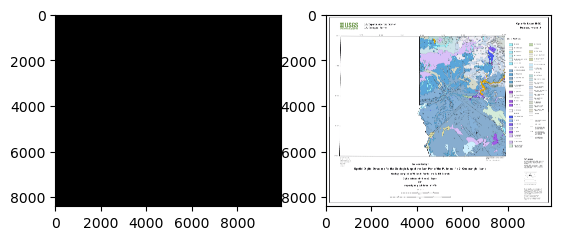

In [67]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [38]:
light_orange = (1, 190, 200)
type(light_orange)

tuple

# A generator provided by Aiman:

In [62]:
dem = SpatialDataGenerator(source=filePath+tifName)
# fig, ax = plt.subplots(1, figsize=(16, 16))
# show(dem.src)